# Komiwojażer

Importacja bibliotek

In [20]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import tsplib95

In [21]:
# Open input file
infile = open('instance/berlin52.tsp', 'r')

# Read instance header
Name = infile.readline().strip().split()[1] # NAME
FileType = infile.readline().strip().split()[1] # TYPE
Comment = infile.readline().strip().split()[1] # COMMENT
Dimension = infile.readline().strip().split()[1] # DIMENSION
EdgeWeightType = infile.readline().strip().split()[1] # EDGE_WEIGHT_TYPE
infile.readline()

# Read node list
N = int(Dimension)
nodelist = []
distances = np.zeros((N, N))

for i in range(0, N):
    x,y = infile.readline().strip().split()[1:]
    nodelist.append([float(x), float(y)])

for i in range(0,N):
    for j in range(0, N):
        # xd = nodelist[i][i]
        distances[i][j] = int(math.sqrt((nodelist[i][0] - nodelist[j][0])**2 + (nodelist[i][1] - nodelist[j][1])**2))
        distances[j][i] = distances[i][j]

# Close input file
infile.close()

Funkcja wczytująca dane z Berlina (2D Euclid)

In [22]:
def set_Matrix():
    # Open input file
    infile = open('instance/berlin52.tsp', 'r')

    # Read instance header
    Name = infile.readline().strip().split()[1] # NAME
    FileType = infile.readline().strip().split()[1] # TYPE
    Comment = infile.readline().strip().split()[1] # COMMENT
    Dimension = infile.readline().strip().split()[1] # DIMENSION
    EdgeWeightType = infile.readline().strip().split()[1] # EDGE_WEIGHT_TYPE
    infile.readline()

    # Read node list
    N = int(Dimension)
    nodelist = []
    distances = np.zeros((N, N))
    for i in range(0, N):
        x,y = infile.readline().strip().split()[1:]
        nodelist.append([float(x), float(y)])

    for i in range(0,N):
        for j in range(0, N):
            # xd = nodelist[i][i]
            distances[i][j] = int(math.sqrt((nodelist[i][0] - nodelist[j][0])**2 + (nodelist[i][1] - nodelist[j][1])**2))
            distances[j][i] = distances[i][j]

    # print(nodelist)
    # Close input file
    infile.close()
    return distances

# Zbiór używanych funkcji

In [23]:
# Wypisanie macierzy odległości
def print_matrix(Distance_Matrix):
    print(Distance_Matrix)

In [24]:
# Zainicjalizowanie symetrycznej losowej macierzy odległości
def symetric_random_instance(number_of_cities, min_distance, max_distance):
    seed = 2021
    np.random.seed(seed)
    rand_matrix =np.random.randint(min_distance, max_distance + 1, size=(number_of_cities,number_of_cities))
    # np.random.random_integers(min_distance, max_distance, size=(number_of_cities,number_of_cities))
    for i in range(number_of_cities):
        rand_matrix[i][i] = 0
        for j in range(number_of_cities):
            rand_matrix[j][i] = rand_matrix[i][j]
    return rand_matrix

A = symetric_random_instance(10,1,10)
print(A)

[[ 0  6 10  1  7  6  9  7  7  7]
 [ 6  0  6  8  2  2  6  3  1  4]
 [10  6  0  7  5  9  6  2  7  8]
 [ 1  8  7  0  7 10  3  5  4 10]
 [ 7  2  5  7  0  2 10  3  8  6]
 [ 6  2  9 10  2  0  8 10  8  8]
 [ 9  6  6  3 10  8  0  1  5  8]
 [ 7  3  2  5  3 10  1  0  7  2]
 [ 7  1  7  4  8  8  5  7  0  8]
 [ 7  4  8 10  6  8  8  2  8  0]]


In [25]:
def asymetric_random_instance(number_of_cities, min_distance, max_distance):
    seed = 2021
    np.random.seed(seed)
    rand_matrix =np.random.randint(min_distance, max_distance + 1, size=(number_of_cities,number_of_cities))
    # np.random.random_integers(min_distance, max_distance, size=(number_of_cities,number_of_cities))
    for i in range(number_of_cities):
        rand_matrix[i][i] = 0
    return rand_matrix
A = asymetric_random_instance(10,1,10)
print(A)

[[ 0  6 10  1  7  6  9  7  7  7]
 [ 7  0  6  8  2  2  6  3  1  4]
 [ 2  1  0  7  5  9  6  2  7  8]
 [ 6  7 10  0  7 10  3  5  4 10]
 [ 3  9  6  4  0  2 10  3  8  6]
 [ 4  8  4 10  5  0  8 10  8  8]
 [ 5  4  3 10  3  6  0  1  5  8]
 [ 4  2 10  5  3  4  7  0  7  2]
 [ 6  8  2 10  6  1  1  5  0  8]
 [ 4  5  8  1  4 10  7 10  4  0]]


In [26]:
def print_solution(solution):
    print(solution)
    '''
    iterate = len(solution) - 1
    for i in range(iterate):
        print(solution[i], ' -> ', solution[i+1], '\n')
    '''

In [27]:
def get_weight(cities_list, Distance_Matrix):
    sum = 0
    n = np.shape(Distance_Matrix)[0]
    for i in range(n-2):
        sum = sum + Distance_Matrix[cities_list[i]][cities_list[i+1]]
    # back to the start city
    sum = sum + Distance_Matrix[n-1][0]
    return sum


## Metoda k-krotnego losowania
1. random numbers from 0 to n-1 e.g. n = 10: (9,5,0,6,7,8,4,3,2,1)
2. calculate cost functions for initial permutation
3. get variables min = initial
4. generate random set as in initial
    4.1. calculate cost function
    4.2. if (current < min>) -> min = current
5. repeat for k-times 

[34, 24, 75, 91, 84, 61, 82, 37, 54, 112, 104, 79, 94, 1, 27, 49, 111, 116, 41, 66, 3, 64, 70, 62, 113, 31, 25, 32, 99, 119, 47, 4, 106, 87, 45, 93, 115, 100, 38, 71, 85, 96, 11, 108, 67, 33, 53, 92, 9, 109, 95, 0, 46, 68, 80, 56, 21, 90, 77, 44, 13, 107, 20, 103, 30, 102, 83, 69, 17, 110, 73, 57, 101, 42, 65, 6, 35, 89, 48, 2, 51, 12, 19, 98, 26, 10, 72, 63, 22, 5, 58, 28, 8, 29, 78, 18, 55, 117, 36, 40, 86, 97, 60, 74, 50, 16, 52, 105, 7, 76, 39, 23, 81, 15, 114, 43, 59, 14, 118, 88]
symetryczne : 	 26358
[11, 106, 97, 86, 85, 41, 81, 32, 0, 18, 104, 54, 92, 40, 62, 108, 38, 22, 88, 24, 26, 119, 2, 47, 25, 30, 115, 107, 94, 46, 49, 31, 1, 72, 48, 105, 82, 102, 23, 29, 36, 101, 27, 34, 63, 99, 37, 28, 39, 71, 117, 80, 93, 87, 65, 7, 6, 73, 113, 66, 12, 9, 17, 75, 42, 100, 79, 78, 96, 44, 61, 52, 118, 68, 13, 112, 84, 3, 69, 76, 57, 109, 74, 50, 5, 91, 43, 4, 56, 60, 10, 58, 51, 90, 20, 116, 21, 70, 45, 89, 33, 110, 15, 77, 53, 83, 103, 55, 35, 19, 14, 98, 114, 59, 111, 8, 64, 67, 16, 

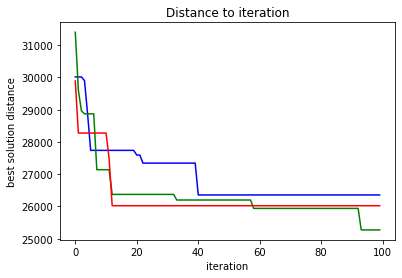

In [28]:
N = 120 # number of cities for random matrix
k = 100 # number of samples
Xsym = [None]*k
Xasym = [None]*k
Xber = [None]*k
number_of_better_solution = 0

max_distance = 500
Matrixx_sym = symetric_random_instance(N, 1, max_distance) # distances from 1 to 100
Matrixx_asym = asymetric_random_instance(N, 1, max_distance)

Matrixx_ber = set_Matrix()
Nber = np.shape(Matrixx_ber)[0]

#initial step
trace_sym = random.sample(range(N),N)
trace_asym = random.sample(range(N),N)
trace_ber = random.sample(range(Nber),Nber)

min_weight_sym  = get_weight(trace_sym, Matrixx_sym)# = funkcja liczaca wage
min_weight_asym  = get_weight(trace_asym, Matrixx_asym)# = funkcja liczaca wage
min_weight_ber  = get_weight(trace_ber, Matrixx_ber)# = funkcja liczaca wage
#print(min_weight)
# min_permutation = trace
# Wielka pentla powtarzajaca sie k-razy
for i in range(k):
    new_trace = random.sample(range(N),N)
    new_weight = get_weight(new_trace, Matrixx_sym)# = funkcja liczaca wage
    if (new_weight < min_weight_sym):
        min_weight_sym = new_weight
        trace_sym = new_trace
        #number_of_better_solution += 1
    Xsym[i] = min_weight_sym

for i in range(k):
    new_trace = random.sample(range(N),N)
    new_weight = get_weight(new_trace, Matrixx_asym)# = funkcja liczaca wage
    if (new_weight < min_weight_asym):
        min_weight_asym = new_weight
        trace_asym = new_trace
    Xasym[i] = min_weight_asym

for i in range(k):
    new_trace = random.sample(range(Nber),Nber)
    new_weight = get_weight(new_trace, Matrixx_ber)# = funkcja liczaca wage
    if (new_weight < min_weight_ber):
        min_weight_ber = new_weight
        trace_ber = new_trace
    Xber[i] = min_weight_ber

print(trace_sym)
print('symetryczne : \t', min_weight_sym)
print(trace_asym)
print('asymetryczne : \t', min_weight_asym)
print(trace_ber)
print('Berlin52 : \t', min_weight_ber)
#print(number_of_better_solution)

plt.plot(Xsym, '-b')
plt.plot(Xasym, '-g')
plt.plot(Xber, '-r')
plt.xlabel('iteration')
plt.ylabel('best solution distance')
# giving a title to my graph
plt.title('Distance to iteration')
plt.show()
#print_solution(trace)


## Metoda najbliższych sąsiadów (odległość)
1. Chose start city
2. Find nearest neighbour for that city ang go there
    - min_distance = distance(current_city, 0_city)
    - min_city = 0_city
    - for i in (N): 
    -   new_distance = distance(current_city, i_city)
    -   if (new_distance < min_distance>) -> min_distance = new_distance, min_city = i_city
    - current_city = min_city
    - add current_city to the way (permutation)
3. Repeat 2nd step for N-times where N is the number of cities

In [29]:
def swapPositions(list, pos1, pos2):
    list[pos1], list[pos2] = list[pos2], list[pos1]
    return list

In [30]:
def nearest_neighbour(aval_city, city_index, Distance_Matrix):
    n = len(aval_city)
    min = Distance_Matrix[city_index][0]
    min_ind = aval_city[0]
    for i in range(1, n):
        next_city = aval_city[i]
        if(Distance_Matrix[city_index][next_city] < min):
                min = Distance_Matrix[city_index][next_city]
                min_ind = aval_city[i]
    aval_city.remove(min_ind)
    return min_ind


In [31]:
N = 120 # number of cities
Matrixx = symetric_random_instance(N, 1, 100)
Matrixx = set_Matrix()
N = np.shape(Matrixx)[0]
solution = [None]*N
aval_city = list(range(0,N))
print(aval_city)
for i in range(N):
    go_to = nearest_neighbour(aval_city, i, Matrixx)
    solution[i] = go_to

distance = get_weight(solution, Matrixx)
print(distance)
#print(solution)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
22128.0


22128.0
16351.0


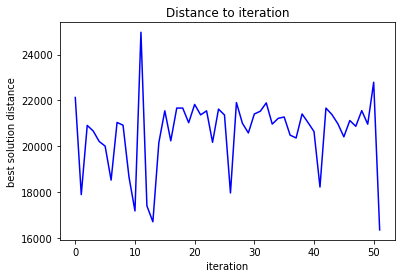

In [32]:
N = 120 # number of cities

Matrixx = symetric_random_instance(N, 1, 100) # random
Matrixx = set_Matrix()  # instance

N = np.shape(Matrixx)[0]
best_solution = [None]*N
current_solution = [None]*N
aval_city = list(range(0,N))
X = []

for i in range(N):
    go_to = nearest_neighbour(aval_city, i, Matrixx)
    best_solution[i] = go_to
best_distance = get_weight(best_solution, Matrixx)

X.append(best_distance)
print(best_distance)

for i in range(1, N):
    aval_city = list(range(0,N))
    for j in range(N):
        go_to = nearest_neighbour(aval_city, i, Matrixx)
        current_solution[j] = go_to
    current_distance = get_weight(current_solution, Matrixx)
    if(current_distance < best_distance):
        best_solution = current_solution
        best_distance = current_distance
    X.append(current_distance)

print(best_distance)
plt.plot(X, '-b')
plt.xlabel('iteration')
plt.ylabel('best solution distance')
# giving a title to my graph
plt.title('Distance to iteration')
plt.show()
#print_solution(trace)

## Metoda najbliższych sąsiadów (swap)

In [33]:
def nearest_swap_neighbour(city_list, Distance_Matrix):
    leng = len(city_list)
    min_weight = get_weight(city_list, Distance_Matrix)
    best_trace = city_list.copy()
    current_trace = city_list.copy()
    for i in range(int(leng/2 +1 )):
        for j in range(leng):
            current_trace = city_list.copy()
            current_trace = swapPositions(current_trace, i, j)
            current_weight = get_weight(current_trace, Distance_Matrix)
            if(current_weight < min_weight):
                best_trace = current_trace
                min_weight = current_weight
    return best_trace

In [34]:
N = 120 # number of cities
k = 100 # how many tryes

#Matrixx_sym = symetric_random_instance(N, 1, 500)   # random
Matrixx_ber = set_Matrix()  # instance

Nber = np.shape(Matrixx_ber)[0]

best_solution = [None]*N
current_solution = [None]*N

trace = random.sample(range(Nber),Nber)
min_weight  = get_weight(trace, Matrixx_ber)# = funkcja liczaca wage
print(min_weight)

for i in range(k):
    trace = nearest_swap_neighbour(trace, Matrixx_ber)

print(get_weight(trace, Matrixx_ber))
#print(trace)



31128.0
10973.0


29092
5691


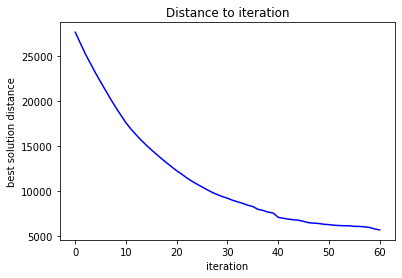

In [35]:
N = 120 # number of cities

#Matrixx_ber = set_Matrix()  # instance
# #Nber = np.shape(Matrixx_ber)[0]
Matrixx_sym = symetric_random_instance(N, 1, 500)   # random



best_solution = [None]*N
current_solution = [None]*N
X = []

trace = random.sample(range(N),N)
min_weight_sym  = get_weight(trace, Matrixx_sym)# = funkcja liczaca wage
print(min_weight_sym)

while(True):
    trace_old = trace.copy()
    trace = nearest_swap_neighbour(trace, Matrixx_sym) # whole step not just simple swap - if this don't update trace then stop
    old = get_weight(trace_old, Matrixx_sym)
    new = get_weight(trace, Matrixx_sym)
    if (old <= new):
        break
    X.append(get_weight(trace, Matrixx_sym))

print(get_weight(trace, Matrixx_sym))
#print(trace)
plt.plot(X, '-b')
plt.xlabel('iteration')
plt.ylabel('best solution distance')
# giving a title to my graph
plt.title('Distance to iteration')
plt.show()
#print_solution(best_solution)

## Metoda 2-opt

In [36]:
def invert(city_list, i, j):
    leng = len(city_list)
    leng_sub_list = j - i 
    current_trace = city_list.copy()
    for k in range(int(leng_sub_list/2 + 1)):
        current_trace = swapPositions(current_trace, i, j - k)
        #print(leng_sub_list)
        i += 1
        # print(current_trace)

    return current_trace

8427.0


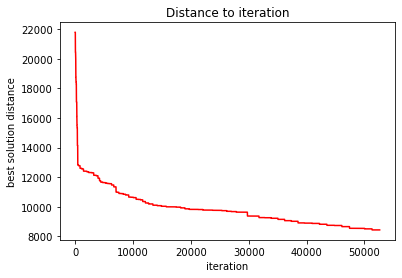

111.73428798727127 %


In [42]:
# N = 50 # number of cities
# k = 10000

# Matrixx = symetric_random_instance(N, 1, 100) # random
Matrixx = set_Matrix()  # instance
N = np.shape(Matrixx)[0]

best_solution = [None]*N
current_solution = [None]*N
X = []
Y = []
aval_city = list(range(0,N))
# trace = random.sample(range(N),N)
for i in range(N):
    go_to = nearest_neighbour(aval_city, i, Matrixx)
    best_solution[i] = go_to
min_weight  = get_weight(best_solution, Matrixx)# = funkcja liczaca wage
#print(min_weight)
#print(best_solution)
improved = True
while(improved):
    i = 0
    while i < N-1:
        j = i + 1
        while j < N:
            current_solution = best_solution.copy()
            current_solution = invert(current_solution, i, j)
            current_distance = get_weight(current_solution, Matrixx)
            if(current_distance < min_weight):
                best_solution = current_solution
                min_weight = current_distance
                i = 0
                j = 0
            
            X.append(min_weight)
            
            j += 1
        Y.append(min_weight)
        i += 1

    improved = False

print(get_weight(best_solution, Matrixx))
plt.plot(X, '-r')
# plt.plot(Y, '-b')
plt.xlabel('iteration')
plt.ylabel('best solution distance')
# giving a title to my graph
plt.title('Distance to iteration')
plt.show()
#print_solution(best_solution)
PRD = min_weight / 7542 * 100
print(PRD, "%")
# print(X)
# print(Y)


[[0.  0.1 0.2 0.3]
 [1.  1.1 1.2 1.3]]
1.0


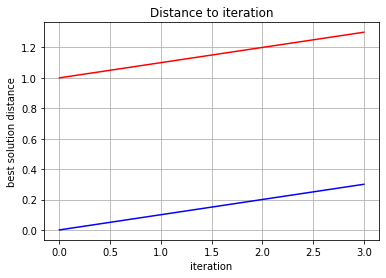

In [38]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[], []])
X = np.append(X, np.array([[0.0], [1.0]]), axis = 1)
X = np.append(X, np.array([[0.1], [1.1]]), axis = 1)
X = np.append(X, np.array([[0.2], [1.2]]), axis = 1)
X = np.append(X, np.array([[0.3], [1.3]]), axis = 1)
print(X)
print(X[1][0])
plt.plot(X[0], '-b', X[1], '-r')
plt.xlabel('iteration')
plt.ylabel('best solution distance')
plt.title('Distance to iteration')
plt.grid(True)
plt.show()

generowanie instancji losowych + wyświetlenie macierzy
    rozmiar, wariant, seed, zakres wartości(odległości)

odpalić algorytmy: wybór instancji
    k-random, dla różnych k
    najbliższy sąsiad (2)
    2opt (może być kilka wersji + warianty jesli są)

co dostać: cykl, długość, PRD